Events Shape: (2756101, 5)
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

Item Properties Shape: (10999999, 4)
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513

Category Tree Shape: (1669, 2)
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691

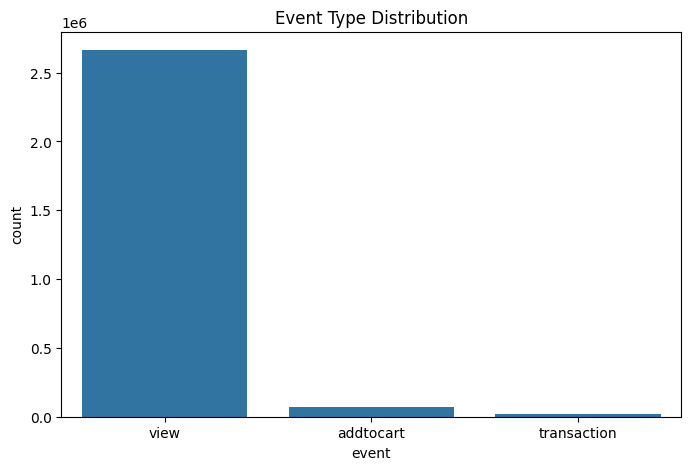

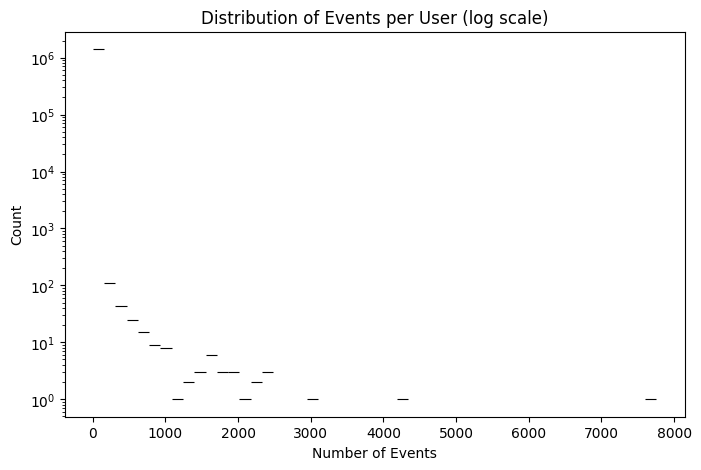

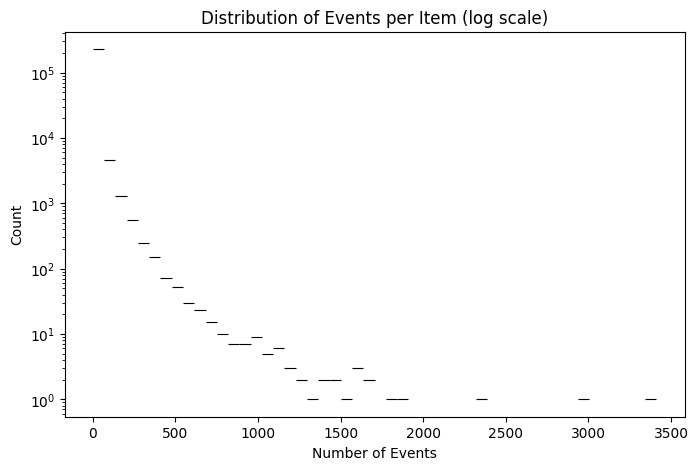

itemid
187946    3412
461686    2978
5411      2334
370653    1854
219512    1800
257040    1647
298009    1642
96924     1633
309778    1628
384302    1608
Name: count, dtype: int64
     timestamp_x  visitorid event  itemid  transactionid   timestamp_y  \
0  1433221332117     257597  view  355908            NaN  1.431832e+12   
1  1433224214164     992329  view  248676            NaN  1.432436e+12   
2  1433221999827     111016  view  318965            NaN           NaN   
3  1433221955914     483717  view  253185            NaN  1.432436e+12   
4  1433221337106     951259  view  367447            NaN  1.433041e+12   

  property                          value  
0      159                         519769  
1      888                         857982  
2      NaN                            NaN  
3      292                        n12.000  
4      653  1314495 237874 536050 1323749  
transactionid    0.991852
timestamp_y      0.092734
property         0.092734
value            0.092734
time

In [1]:
# Retailrocket EDA

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data
events = pd.read_csv('../data/events.csv')
item_properties = pd.read_csv('../data/item_properties_part1.csv')  # and part2 if you merge
category_tree = pd.read_csv('../data/category_tree.csv')

# 3. Quick Look at Data
print("Events Shape:", events.shape)
print(events.head())

print("\nItem Properties Shape:", item_properties.shape)
print(item_properties.head())

print("\nCategory Tree Shape:", category_tree.shape)
print(category_tree.head())

# 4. Events Data Overview
print(events['event'].value_counts())
print(events['timestamp'].min(), events['timestamp'].max())

# 5. Unique Users and Items
n_users = events['visitorid'].nunique()
n_items = events['itemid'].nunique()

print(f"Unique users: {n_users}")
print(f"Unique items: {n_items}")

# 6. Event Type Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='event', data=events, order=events['event'].value_counts().index)
plt.title('Event Type Distribution')
plt.show()

# 7. User Activity (Events per User)
user_event_count = events.groupby('visitorid').size()
plt.figure(figsize=(8,5))
sns.histplot(user_event_count, bins=50, log_scale=(False, True))
plt.title('Distribution of Events per User (log scale)')
plt.xlabel('Number of Events')
plt.show()

# 8. Item Popularity (Events per Item)
item_event_count = events.groupby('itemid').size()
plt.figure(figsize=(8,5))
sns.histplot(item_event_count, bins=50, log_scale=(False, True))
plt.title('Distribution of Events per Item (log scale)')
plt.xlabel('Number of Events')
plt.show()

# 9. Most Popular Items
top_items = events['itemid'].value_counts().head(10)
print(top_items)

# 10. Merge Item Properties
# Only taking a sample if it's too big
item_properties_sample = item_properties.groupby('itemid').first().reset_index()
events_props = pd.merge(events, item_properties_sample, on='itemid', how='left')

print(events_props.head())

# 11. Check Missing Values
print(events_props.isnull().mean().sort_values(ascending=False).head(10))

# 12. Category Tree Overview
print(category_tree.head())
print(category_tree['categoryid'].nunique())

# 13. Save Some Useful Info for Modeling
useful_items = item_event_count[item_event_count > 10].index
useful_users = user_event_count[user_event_count > 5].index

filtered_events = events[(events['itemid'].isin(useful_items)) & (events['visitorid'].isin(useful_users))]
print(f"Filtered events: {filtered_events.shape}")

filtered_events.to_csv('../data/filtered_events.csv', index=False)

# 14. Summary
print(f"""
Summary:
- {n_users} unique users
- {n_items} unique items
- Event types: {events['event'].unique()}
- Data span: {pd.to_datetime(events['timestamp'], unit='ms').min()} to {pd.to_datetime(events['timestamp'], unit='ms').max()}
- After filtering: {filtered_events['visitorid'].nunique()} users, {filtered_events['itemid'].nunique()} items
""")